In [1]:
import pandas as pd
import numpy as np 
link=r"C:\Users\Seenivasan\Desktop\data\train.xlsx"
data=pd.read_excel(link)
data.head( )

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Prod_Sub_Class,Sales_Quantity
0,PKCM3,4,2021-03-23,CHUTNEY,MANGO,SWEET,NaN,2.0
1,LMDA7,10,2022-10-07,SPICES,ROASTED GRAM,DAL,NaN,5.0
2,LFVG3,4,2021-07-30,FROZEN,VEGETABLE,GREEN PEAS,NaN,6.0
3,9DMR6,10,2021-10-21,NUTS,DATES,WHOLE,NaN,9.0
4,LFPS3,10,2022-10-28,FROZEN,RTC - VEG,SNACKS,SAMOSA,1.0


In [2]:
# Identify missing values
missing_values = data.isnull()

# Count missing values
missing_count = missing_values.sum()

# Print the count of missing values
print(missing_count)

Item                   0
Loc                    0
Forecast_Dt            0
Category               0
Sub_Category           0
Prod_Class        157905
Prod_Sub_Class    635838
Sales_Quantity         0
dtype: int64


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017310 entries, 0 to 1017309
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Item            1017310 non-null  object        
 1   Loc             1017310 non-null  int64         
 2   Forecast_Dt     1017310 non-null  datetime64[ns]
 3   Category        1017310 non-null  object        
 4   Sub_Category    1017310 non-null  object        
 5   Prod_Class      859405 non-null   object        
 6   Prod_Sub_Class  381472 non-null   object        
 7   Sales_Quantity  1017310 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.1+ MB


In [4]:
data_dim=data.shape
print(f"Our Data Dimensions Has {data_dim[0]} Records and {data_dim[1]} Attribute")

Our Data Dimensions Has 1017310 Records and 8 Attribute


In [5]:
data.describe()

,Loc,Sales_Quantity
count,1.017310e+06,1.017310e+06
mean,6.359213e+00,8.514239e+00
std,3.090627e+00,3.678175e+01
min,2.000000e+00,-4.730000e+02
25%,4.000000e+00,1.000000e+00
50%,6.000000e+00,2.000000e+00
75%,1.000000e+01,5.000000e+00
max,1.100000e+01,4.096000e+03


In [6]:
# Identify missing values
missing_values = data.isnull()

# Count missing values
missing_count = missing_values.sum()

# Print the count of missing values
print(missing_count)

Item                   0
Loc                    0
Forecast_Dt            0
Category               0
Sub_Category           0
Prod_Class        157905
Prod_Sub_Class    635838
Sales_Quantity         0
dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

# Select the categorical column(s) with missing values
categorical_columns = ['Prod_Class']

# Initialize the imputer with the mode strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing categorical values
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

In [8]:
# Print the updated dataset
data.head()

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Prod_Sub_Class,Sales_Quantity
0,PKCM3,4,2021-03-23,CHUTNEY,MANGO,SWEET,NaN,2.0
1,LMDA7,10,2022-10-07,SPICES,ROASTED GRAM,DAL,NaN,5.0
2,LFVG3,4,2021-07-30,FROZEN,VEGETABLE,GREEN PEAS,NaN,6.0
3,9DMR6,10,2021-10-21,NUTS,DATES,WHOLE,NaN,9.0
4,LFPS3,10,2022-10-28,FROZEN,RTC - VEG,SNACKS,SAMOSA,1.0


In [9]:
# Again Identify missing values
missing_values = data.isnull()

# Count missing values
missing_count = missing_values.sum()

# Print the count of missing values
print(missing_count)

Item                   0
Loc                    0
Forecast_Dt            0
Category               0
Sub_Category           0
Prod_Class             0
Prod_Sub_Class    635838
Sales_Quantity         0
dtype: int64


In [10]:
# Calculate the percentage of missing values in each column
missing_percentages = data.isnull().mean() * 100

# Set a threshold for the maximum allowed missing values
threshold = 50  # Example threshold of 50% missing values

# Identify columns with missing values exceeding the threshold
columns_to_drop = missing_percentages[missing_percentages > threshold].index

# Drop the columns with the most missing values
data_dropped = data.drop(columns_to_drop, axis=1)



In [11]:
# Print the updated dataset
data_dropped.head()

,Item,Loc,Forecast_Dt,Category,Sub_Category,Prod_Class,Sales_Quantity
0,PKCM3,4,2021-03-23,CHUTNEY,MANGO,SWEET,2.0
1,LMDA7,10,2022-10-07,SPICES,ROASTED GRAM,DAL,5.0
2,LFVG3,4,2021-07-30,FROZEN,VEGETABLE,GREEN PEAS,6.0
3,9DMR6,10,2021-10-21,NUTS,DATES,WHOLE,9.0
4,LFPS3,10,2022-10-28,FROZEN,RTC - VEG,SNACKS,1.0


In [12]:
data_dropped.duplicated().sum()

0

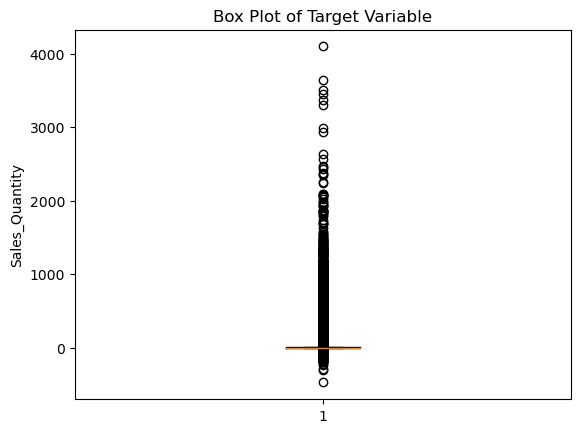

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of the target variable
plt.boxplot(data['Sales_Quantity'])

# Set the title and y-axis label
plt.title('Box Plot of Target Variable')
plt.ylabel('Sales_Quantity')

# Display the plot
plt.show()

### Insight 1: Top-selling products

In [14]:
# Top-selling products
top_selling_products = data_dropped.groupby('Sub_Category')['Sales_Quantity'].sum().nlargest(5)
print("Top Selling Products:")
print(top_selling_products)
print("-------------------------------------------")

Top Selling Products:
Sub_Category
WHOLE WHEAT     1.591103e+06
SOUTH INDIAN    8.441674e+05
MANGO           8.430129e+05
MASALA          4.727503e+05
OTHERS          4.714264e+05
Name: Sales_Quantity, dtype: float64
-------------------------------------------


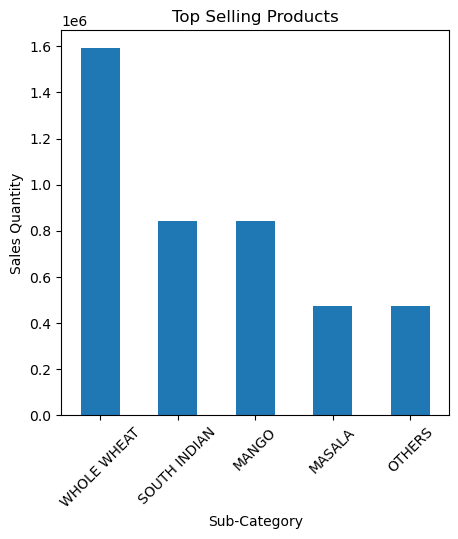

In [15]:
import matplotlib.pyplot as plt

# Plotting the top-selling products
top_selling_products = data_dropped.groupby('Sub_Category')['Sales_Quantity'].sum().nlargest(5)

plt.figure(figsize=(5, 5))
top_selling_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Sub-Category')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.show()

### Insight 2: Plotting the location-based analysis

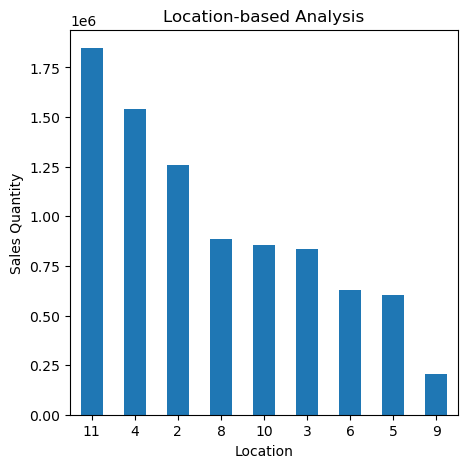

In [16]:

# Group the data by location and calculate the total sales quantity for each location
location_sales = data_dropped.groupby('Loc')['Sales_Quantity'].sum()

# Sort the locations by sales quantity in descending order
sorted_locations = location_sales.sort_values(ascending=False)

# Plotting the location-based analysis
plt.figure(figsize=(5, 5))
sorted_locations.plot(kind='bar')
plt.title('Location-based Analysis')
plt.xlabel('Location')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=0)
plt.show()


### Insight 3: The category and sub-category analysis for the top 20 sub-categories

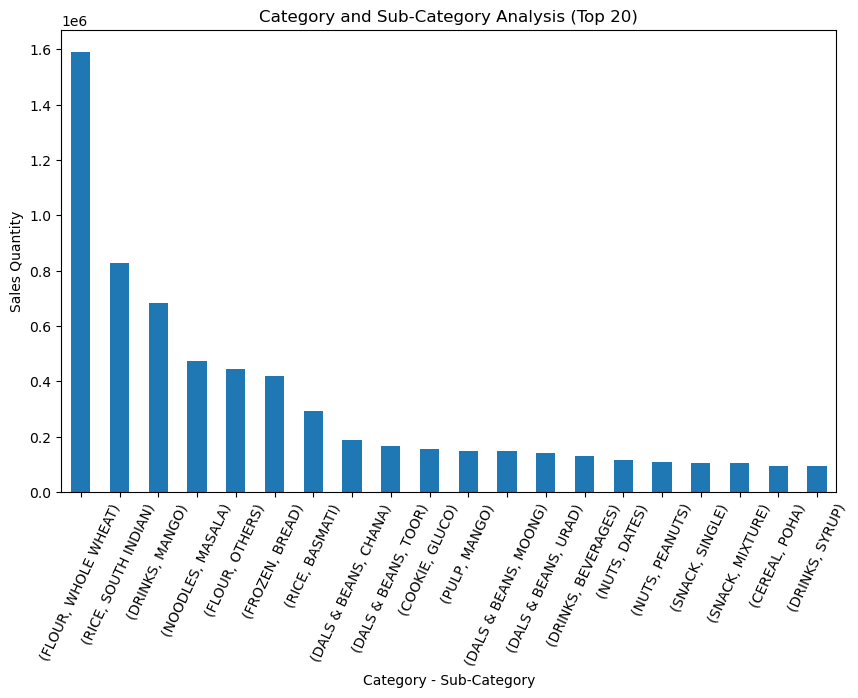

In [17]:
# Group the data by category and sub-category and calculate the total sales quantity for each combination
category_sales = data_dropped.groupby(['Category', 'Sub_Category'])['Sales_Quantity'].sum()

# Sort the categories and sub-categories by sales quantity in descending order
sorted_categories = category_sales.sort_values(ascending=False)

# Consider only the top 20 sub-categories
top_15_subcategories = sorted_categories[:20]

# Plotting the category and sub-category analysis for the top 20 sub-categories
plt.figure(figsize=(10, 6))
top_15_subcategories.plot(kind='bar')
plt.title('Category and Sub-Category Analysis (Top 20)')
plt.xlabel('Category - Sub-Category')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=65)
plt.show()

### Insight 4: Sales Trend Analysis (Quarterly)

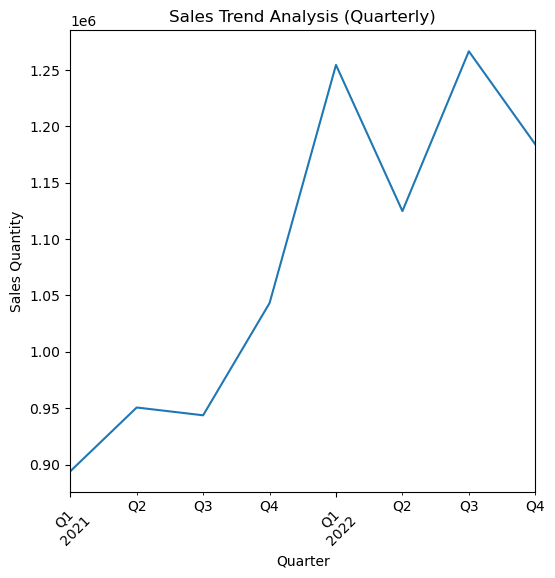

In [18]:
# Convert the date column to datetime if it's not already in datetime format
data_dropped['Forecast_Dt'] = pd.to_datetime(data_dropped['Forecast_Dt'])

# Resample the data to quarterly intervals and calculate the total sales quantity for each quarter
quarterly_sales = data_dropped.resample('Q', on='Forecast_Dt')['Sales_Quantity'].sum()

# Plotting the trend analysis
plt.figure(figsize=(6, 6))
quarterly_sales.plot(kind='line')
plt.title('Sales Trend Analysis (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.show()

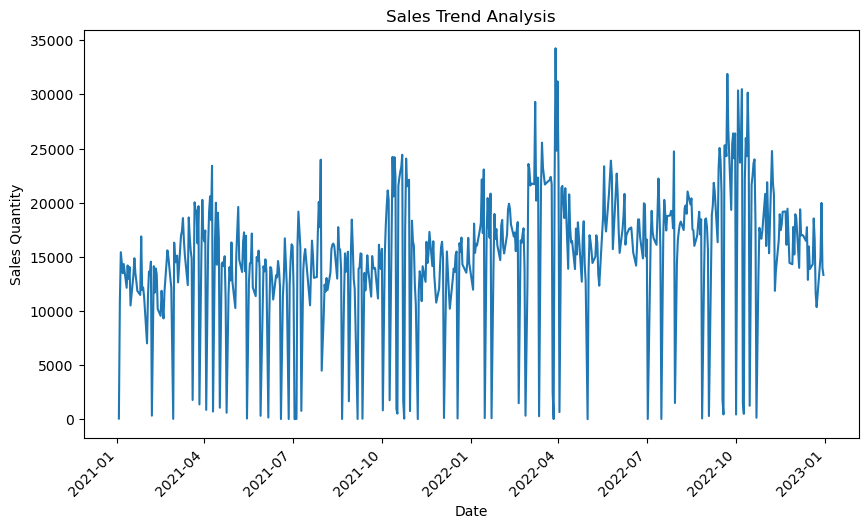

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime if it's not already in datetime format
data_dropped['Forecast_Dt'] = pd.to_datetime(data_dropped['Forecast_Dt'])

# Group the data by date and calculate the total sales quantity for each date
daily_sales = data_dropped.groupby('Forecast_Dt')['Sales_Quantity'].sum()

# Plotting the trend analysis
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line')
plt.title('Sales Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.show()


### Insight 5: Pie Chart Category Distribution

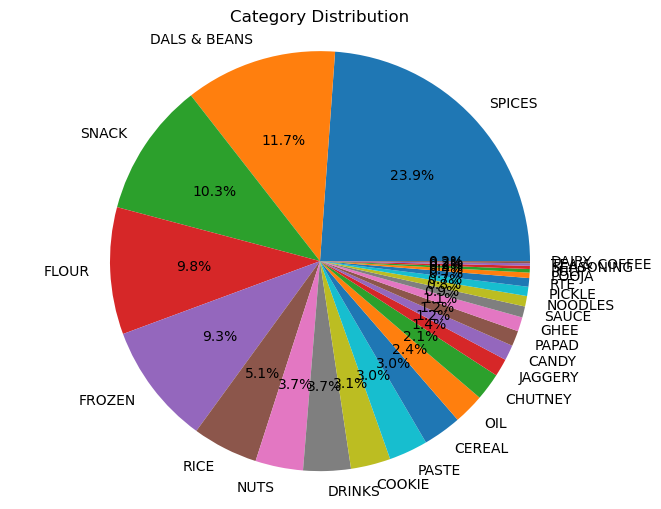

In [20]:
# Calculate the value counts for a specific column
value_counts = data_dropped['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.axis('equal')
plt.show()